## MOBILENET ARCHITECTURE

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU


from time import time
import numpy as np

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

2.17.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import shutil

# Path to the ZIP file in your Drive
source_path = "/content/drive/My Drive/datasets 2.zip"

# Destination path in Colab workspace
destination_path = "/content/datasets.zip"

# Copy the file
shutil.copy(source_path, destination_path)

import zipfile

# Path to the ZIP file
zip_file_path = "/content/datasets.zip"

# Directory to extract to
extract_to_path = "/content/"

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete!")


Mounted at /content/drive
Extraction complete!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'datasets/train',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 2800 images belonging to 4 classes.


In [ ]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'datasets/test',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 2000 images belonging to 4 classes.


In [ ]:
def mobilenet(input_shape, n_classes):

  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x


  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)

  x = GlobalAvgPool2D()(x)

  output = Dense(n_classes, activation='softmax')(x)

  model = Model(input, output)
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tensorflow.keras.metrics.Precision()])
  return model


input_shape = 224, 224, 3
n_classes = 4

K.clear_session()
model = mobilenet(input_shape, n_classes)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 112, 112, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d (DepthwiseConv2D)   │ (None, 112, 112, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_1 (DepthwiseConv2D) │ (None, 56, 56, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_2 (DepthwiseConv2D) │ (None, 56, 56, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,243,908 (12.37 MB)

 Trainable params: 3,222,020 (12.29 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
model_path = "model.keras"

from keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [ ]:
epochs = 100
batch_size = 32

In [ ]:
#### Fitting the model
history = model.fit(
           train_data, steps_per_epoch=train_data.samples // batch_size,
           epochs=epochs,
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.4708 - loss: 0.8874 - precision: 0.4985
Epoch 1: accuracy improved from -inf to 0.50614, saving model to model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 100s 686ms/step - accuracy: 0.4712 - loss: 0.8864 - precision: 0.4987 - val_accuracy: 0.2485 - val_loss: 4.8541 - val_precision: 0.2485
Epoch 2/100
 1/87 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.6875 - loss: 0.6237 - precision: 0.6875
Epoch 2: accuracy improved from 0.50614 to 0.68750, saving model to model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6875 - loss: 0.6237 - precision: 0.6875 - val_accuracy: 0.4375 - val_loss: 3.2464 - val_precision: 0.4375
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5486 - loss: 0.7195 - precision: 0.5508
Epoch 3: accuracy did not improve from 0.68750
87/87 ━━━━━━━━━━━━━━━━━━━━ 95s 447ms/step - accuracy: 0.5487 - loss: 0.7194 - precision: 0.5509 - val_accuracy: 0.2500 - val_loss: 6.2411 - val_precision

In [ ]:
# Continue training for 10 more epochs
history_2 = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    epochs=20,  # New number of epochs
    validation_data=test_data,
    validation_steps=test_data.samples // batch_size,
    callbacks=[M]  # Use the same or new callbacks if needed
)


Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.8667 - loss: 0.3139 - precision: 0.8669
Epoch 1: accuracy did not improve from 0.90625
87/87 ━━━━━━━━━━━━━━━━━━━━ 42s 453ms/step - accuracy: 0.8666 - loss: 0.3138 - precision: 0.8669 - val_accuracy: 0.7011 - val_loss: 0.9555 - val_precision: 0.7038
Epoch 2/20
 1/87 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.9375 - loss: 0.2130 - precision: 0.9375
Epoch 2: accuracy improved from 0.90625 to 0.93750, saving model to model.keras
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9375 - loss: 0.2130 - precision: 0.9375 - val_accuracy: 0.8750 - val_loss: 0.6058 - val_precision: 0.8750
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.8957 - loss: 0.2650 - precision: 0.8957
Epoch 3: accuracy did not improve from 0.93750
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 435ms/step - accuracy: 0.8955 - loss: 0.2652 - precision: 0.8955 - val_accuracy: 0.7777 - val_loss: 0.6251 - val_precision: 0.7789
Epoch 4/20
 1/87 ━━━━━━━━━

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'val_accuracy', 'val_loss', 'val_precision'])

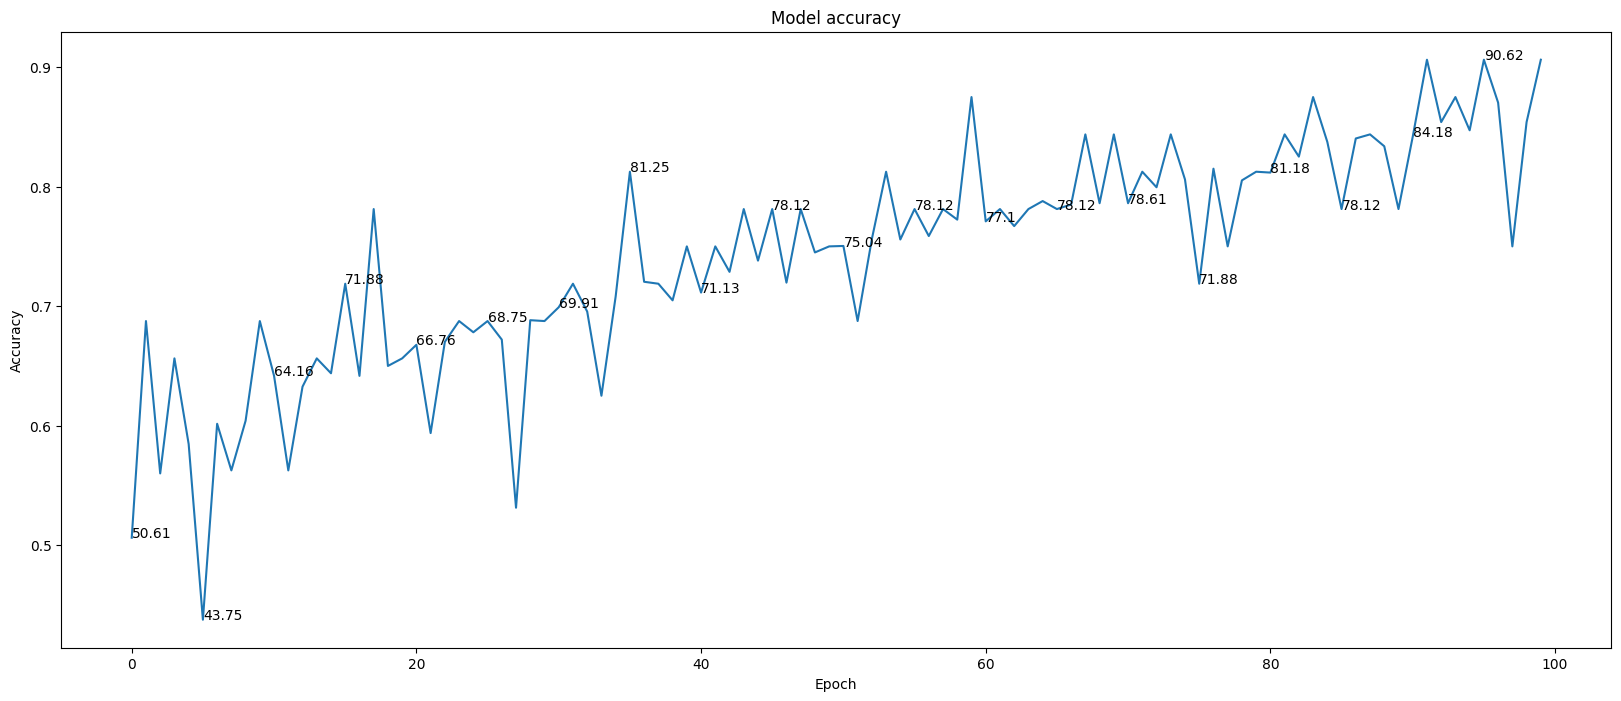

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

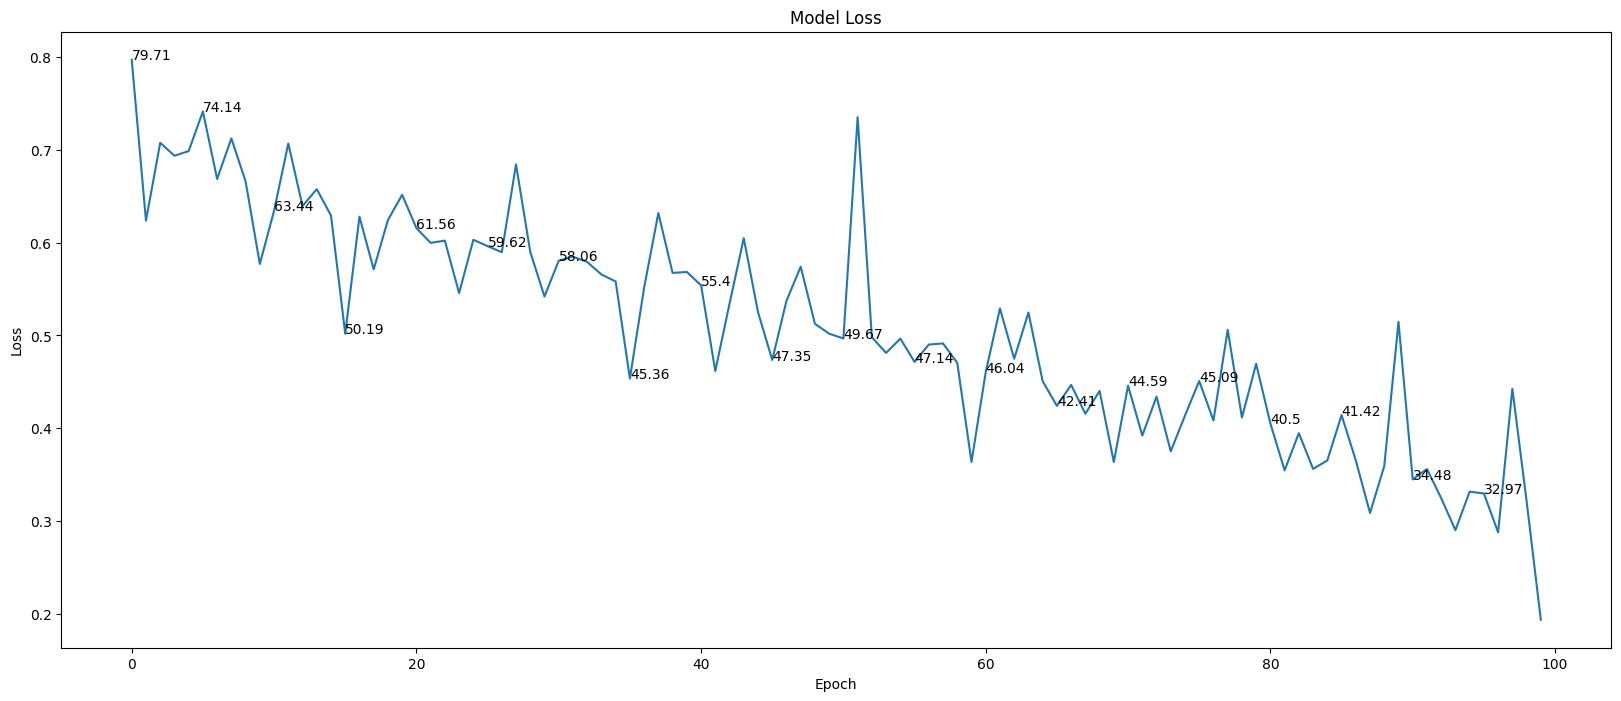

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Print the model's architecture
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 112, 112, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d (DepthwiseConv2D)   │ (None, 112, 112, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_1 (DepthwiseConv2D) │ (None, 56, 56, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_2 (DepthwiseConv2D) │ (None, 56, 56, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,687,950 (36.96 MB)

 Trainable params: 3,222,020 (12.29 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 6,444,042 (24.58 MB)

<ipython-input-5-528ac3772eb9>:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plasma = plt.cm.get_cmap("plasma")


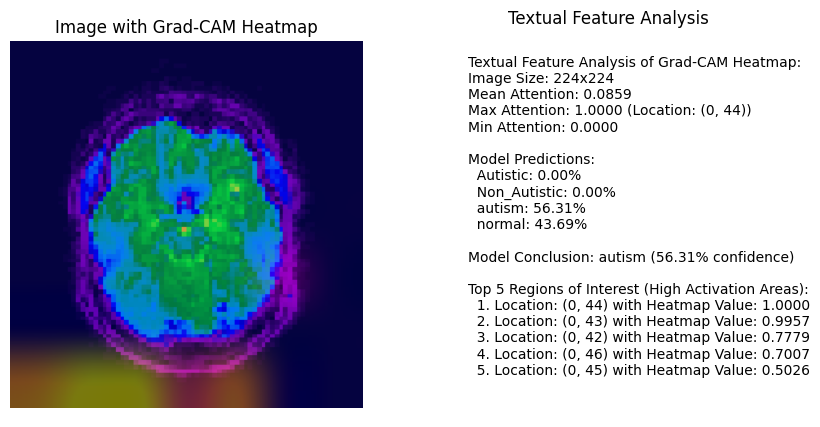

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = load_model('model.keras')

# Function to preprocess input image
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

# Function to compute Grad-CAM heatmap
def generate_grad_cam(model, img_array, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the target class w.r.t. the feature map output
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])  # Predicted class
        class_channel = predictions[:, pred_index]

    # Compute gradients
    grads = tape.gradient(class_channel, conv_outputs)

    # Compute guided gradients
    guided_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute the Grad-CAM heatmap
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(guided_grads, conv_outputs), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap, predictions

# Function to overlay Grad-CAM heatmap on the original image
def overlay_heatmap(img_path, heatmap, alpha=0.6):
    img = load_img(img_path)
    img = np.array(img)

    # Rescale heatmap to [0, 255]
    heatmap = np.uint8(255 * heatmap)

    # Apply colormap (using 'plasma' for clearer distinction)
    plasma = plt.cm.get_cmap("plasma")
    plasma_colors = plasma(np.arange(256))[:, :3]
    plasma_heatmap = plasma_colors[heatmap]

    # Create an image with RGB heatmap
    plasma_heatmap = tf.keras.preprocessing.image.array_to_img(plasma_heatmap)
    plasma_heatmap = plasma_heatmap.resize((img.shape[1], img.shape[0]))
    plasma_heatmap = np.array(plasma_heatmap)

    # Superimpose heatmap on the image
    superimposed_img = plasma_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    return superimposed_img

# Function to perform textual feature analysis
def textual_feature_analysis(heatmap, img_shape, predictions, class_names, threshold=50):
    heatmap_flat = heatmap.flatten()
    mean_attention = np.mean(heatmap_flat)
    max_attention = np.max(heatmap_flat)
    min_attention = np.min(heatmap_flat)
    top_indices = np.argsort(heatmap_flat)[-5:][::-1]
    top_coordinates = [(index // img_shape[1], index % img_shape[1]) for index in top_indices]

    # Extract prediction probabilities
    prediction_probabilities = predictions[0] * 100  # Convert to percentages
    predicted_class_index = np.argmax(prediction_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    confidence = prediction_probabilities[predicted_class_index]

    # Prepare textual summary
    analysis = f"Textual Feature Analysis of Grad-CAM Heatmap:\n"
    analysis += f"Image Size: {img_shape[0]}x{img_shape[1]}\n"
    analysis += f"Mean Attention: {mean_attention:.4f}\n"
    analysis += f"Max Attention: {max_attention:.4f} (Location: {top_coordinates[0]})\n"
    analysis += f"Min Attention: {min_attention:.4f}\n\n"
    analysis += f"Model Predictions:\n"
    for i, class_name in enumerate(class_names):
        analysis += f"  {class_name}: {prediction_probabilities[i]:.2f}%\n"
    analysis += f"\nModel Conclusion: {predicted_class_name} ({confidence:.2f}% confidence)\n\n"
    analysis += f"Top 5 Regions of Interest (High Activation Areas):\n"
    for i, coord in enumerate(top_coordinates):
        analysis += f"  {i+1}. Location: {coord} with Heatmap Value: {heatmap_flat[top_indices[i]]:.4f}\n"

    return analysis

# Example Usage
image_path = "datasets/test/autism/2252-29060-73.png"  # Replace with your image path
target_size = (224, 224)  # Replace with your model input size
last_conv_layer_name = "conv2d_13"  # Your model's last conv layer
class_names = ['Autistic', 'Non_Autistic', 'autism', 'normal']  # Your class names

# Preprocess the image
img_array = preprocess_image(image_path, target_size)

# Generate Grad-CAM heatmap and predictions
heatmap, predictions = generate_grad_cam(model, img_array, last_conv_layer_name)

# Perform textual feature analysis
analysis = textual_feature_analysis(heatmap, img_array.shape[1:3], predictions, class_names)

# Overlay heatmap on the original image
superimposed_img = overlay_heatmap(image_path, heatmap)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(superimposed_img)
plt.axis("off")
plt.title("Image with Grad-CAM Heatmap")

plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, analysis, fontsize=10, va='center', wrap=True)
plt.axis("off")
plt.title("Textual Feature Analysis")
plt.show()


Found 2000 images belonging to 4 classes.
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step
Accuracy: 0.771
F1 Score (Macro): 0.7688572259082838
F1 Score (Micro): 0.771
F1 Score (Weighted): 0.7688572259082838
AUC-ROC Scores: {'Autistic': 0.9521253333333334, 'Non_Autistic': 0.9521626666666666, 'autism': 0.9571573333333334, 'normal': 0.9569880000000001}

Classification Report:
              precision    recall  f1-score   support

    Autistic       0.84      0.64      0.73       500
Non_Autistic       0.71      0.88      0.79       500
      autism       0.75      0.85      0.80       500
      normal       0.82      0.72      0.77       500

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.77      0.77      2000



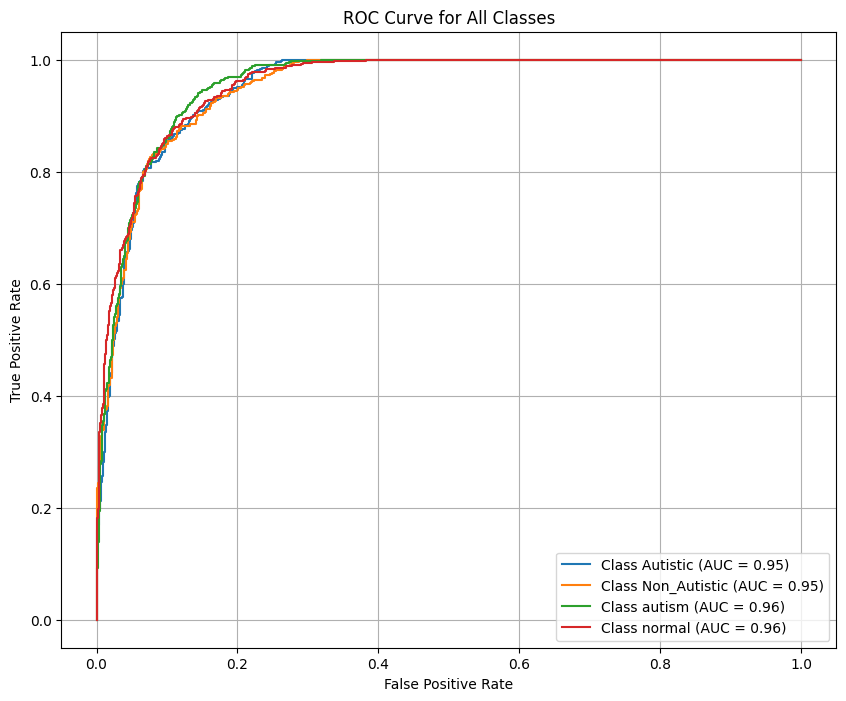

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score
from tensorflow.keras.models import load_model

# Load the model
model = load_model('model.keras')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for test data (ensure the same preprocessing as during training)
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values between 0 and 1

# Define test data generator
test_generator = test_datagen.flow_from_directory(
    './datasets/test',  # Replace with your test dataset directory
    target_size=(224, 224),  # Replace with the input size of your MobileNet model
    batch_size=32,          # Adjust batch size as needed
    class_mode='categorical',  # Ensure labels are one-hot encoded
    shuffle=False           # Do not shuffle for consistent evaluation
)


# Get the true labels and predictions
true_labels = test_generator.classes  # Ground truth labels
class_indices = test_generator.class_indices  # Class label mappings
num_classes = len(class_indices)

# Predict probabilities
predictions_probabilities = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions_probabilities, axis=1)

# Compute Accuracy
accuracy = accuracy_score(true_labels, predicted_classes)

# Compute F1 Score (Macro, Micro, and Weighted)
f1_macro = f1_score(true_labels, predicted_classes, average='macro')
f1_micro = f1_score(true_labels, predicted_classes, average='micro')
f1_weighted = f1_score(true_labels, predicted_classes, average='weighted')

# Compute AUC-ROC for each class
one_hot_labels = tf.keras.utils.to_categorical(true_labels, num_classes=num_classes)
auc_scores = {
    class_name: roc_auc_score(one_hot_labels[:, i], predictions_probabilities[:, i])
    for class_name, i in class_indices.items()
}

# Print classification report
report = classification_report(true_labels, predicted_classes, target_names=class_indices.keys())

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Macro): {f1_macro}")
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Weighted): {f1_weighted}")
print(f"AUC-ROC Scores: {auc_scores}")
print("\nClassification Report:")
print(report)

# Optional: Plot ROC curve for each class
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for class_name, i in class_indices.items():
    fpr, tpr, _ = roc_curve(one_hot_labels[:, i], predictions_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {auc_scores[class_name]:.2f})")

plt.title('ROC Curve for All Classes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load the trained MobileNet model
model = load_model('model.keras')  # Ensure 'model.keras' is in the correct directory

# Step 2: Prepare the test generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
test_generator = test_datagen.flow_from_directory(
    '/content/datasets/test',  # Path to test dataset
    target_size=(224, 224),  # Ensure this matches your model's input size
    batch_size=32,          # Adjust as needed
    class_mode='categorical',
    shuffle=False           # Do not shuffle to keep predictions aligned with labels
)

# Step 3: Run inference on the test dataset
predictions_probabilities = model.predict(test_generator, verbose=1)  # Predict probabilities
class_labels = list(test_generator.class_indices.keys())  # ['Autistic', 'Non_Autistic', 'autism', 'normal']

# Step 4: Prepare meta-datasets for face and MRI data
face_meta_dataset = []
mri_meta_dataset = []

face_serial_no = 1  # Initialize serial number for face data
mri_serial_no = 1   # Initialize serial number for MRI data

for i, prob in enumerate(predictions_probabilities):
    true_label = test_generator.classes[i]  # Ground truth class index
    predicted_class = np.argmax(prob)  # Predicted class index

    # Map probabilities to "Percentage of Autism"
    if class_labels[predicted_class] in ['Non_Autistic', 'normal']:
        percentage_of_autism = (1 - prob[predicted_class]) * 100
        marker = 0
    else:
        percentage_of_autism = prob[predicted_class] * 100
        marker = 1

    # Add to the appropriate dataset
    if class_labels[true_label] in ['Autistic', 'Non_Autistic']:
        face_meta_dataset.append({
            "Serial No": face_serial_no,
            "P_Autism": percentage_of_autism,
            "Marker": marker
        })
        face_serial_no += 1
    elif class_labels[true_label] in ['autism', 'normal']:
        mri_meta_dataset.append({
            "Serial No": mri_serial_no,
            "P_Autism": percentage_of_autism,
            "Marker": marker
        })
        mri_serial_no += 1

# Step 5: Convert to DataFrames
face_meta_df = pd.DataFrame(face_meta_dataset)
mri_meta_df = pd.DataFrame(mri_meta_dataset)

# Step 6: Save to Excel with two sheets
output_path = 'meta_dataset.xlsx'
with pd.ExcelWriter(output_path) as writer:
    face_meta_df.to_excel(writer, sheet_name='Face Data', index=False)
    mri_meta_df.to_excel(writer, sheet_name='MRI Data', index=False)

print(f"Meta-dataset saved to {output_path}")

# Step 7: Display the first few rows for verification
print("Face Data:")
print(face_meta_df.head())
print("\nMRI Data:")
print(mri_meta_df.head())


Found 2000 images belonging to 4 classes.
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step
Meta-dataset saved to meta_dataset.xlsx
Face Data:
   Serial No   P_Autism  Marker
0          1  64.589483       1
1          2  99.538320       1
2          3  86.842322       1
3          4   0.119126       0
4          5  93.343091       1

MRI Data:
   Serial No   P_Autism  Marker
0          1  93.265873       1
1          2  99.426854       1
2          3  89.251125       1
3          4  56.314254       1
4          5  79.782963       1


In [ ]:
model.save("model.keras")
model.save("model.h5")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("model.keras")  # For .h5 format

# Print the model's architecture
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 112, 112, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d (DepthwiseConv2D)   │ (None, 112, 112, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_1 (DepthwiseConv2D) │ (None, 56, 56, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_2 (DepthwiseConv2D) │ (None, 56, 56, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,687,950 (36.96 MB)

 Trainable params: 3,222,020 (12.29 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 6,444,042 (24.58 MB)

In [ ]:
!python --version

Python 3.11.11


In [ ]:
import tensorflow
import tensorflow as tf
print(tf.__version__)


2.17.1


In [ ]:
!python --version

Python 3.11.11
